In [1]:
#importing dependencies and connecting to postgres Employees_DB database

import pandas as pd
import matplotlib.pyplot as plt
from config import usr
from config import passwd
from config import host_name
from sqlalchemy import create_engine
eng="postgresql://"+usr+":"+passwd+ "@" + host_name + "/Employees_DB"
engine = create_engine(eng)
# connection = engine.connect()

In [2]:
#reading salaries table using pandas and cretating dataFrame 
salaries_df = pd.read_sql_table('salaries', engine)
salaries_df

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000,1997-06-02,1998-06-02
300020,499996,58058,1996-05-13,1997-05-13
300021,499997,49597,1987-08-30,1988-08-29
300022,499998,40000,1993-12-27,1994-12-27


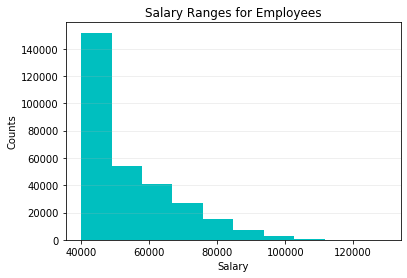

In [9]:
#plotting histogram on salary using matplotlib 
salaries = salaries_df['salary']
plt.hist(salaries,color = 'c')
plt.xlabel('Salary')
plt.ylabel('Counts')
plt.title('Salary Ranges for Employees')
plt.grid(axis = 'y', alpha = 0.25)
plt.savefig('..\Histogram Salary.png')
plt.show()


In [4]:
#reading titles table using pandas and cretating dataFrame 
titles_df = pd.read_sql_table('titles', engine)
titles_df

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,NaT
443305,499998,Senior Staff,1998-12-27,NaT
443306,499998,Staff,1993-12-27,1998-12-27


In [5]:
#salaries data does not seem to cover the whole time period for the employees , and hence does not have salary 
#information for some employees whose titles changed over time . A merge based on emp_no and from_date is able to
#get the salary information for the titles in that time period.

#merging titles DF and Salaries DF based on emp_no and from_date using inner merge
titles_sal_combined = pd.merge(titles_df,salaries_df,how="inner",on=("emp_no","from_date"))
titles_sal_reduced  = titles_sal_combined[["title","salary"]]
titles_sal_reduced



,title,salary
0,Senior Engineer,60117
1,Staff,65828
2,Senior Engineer,40006
3,Engineer,40054
4,Staff,78228
...,...,...
300019,Engineer,40000
300020,Engineer,58058
300021,Engineer,49597
300022,Staff,40000


In [6]:
#Averge salary by title calculation

titles_sal_grouped = titles_sal_reduced.groupby("title")
avg_sal_by_title = titles_sal_grouped["salary"].mean().sort_values(ascending = False)

avg_sal_by_title

title
Senior Staff          58547.693682
Staff                 58465.500955
Manager               57290.777778
Technique Leader      48580.975053
Engineer              48547.807738
Assistant Engineer    48493.204786
Senior Engineer       48425.342063
Name: salary, dtype: float64

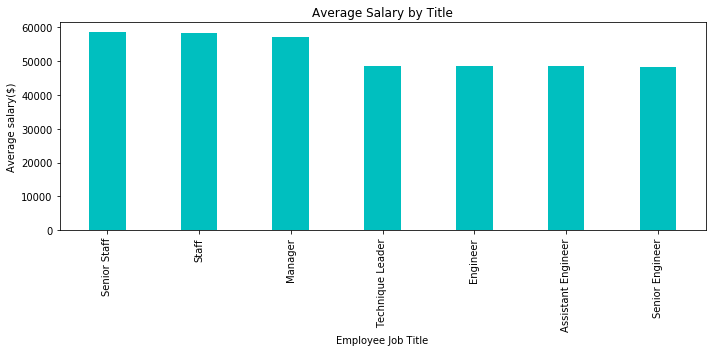

In [12]:
#Bar plot to show Avergae salary by title

plt.figure(figsize=(10,5))
plt.bar(avg_sal_by_title.index,avg_sal_by_title.values,width = 0.4,color='c')
plt.xticks(rotation = 90)
plt.xlabel('Employee Job Title')
plt.ylabel('Average salary($)')
plt.title('Average Salary by Title')
plt.tight_layout()
plt.savefig('..\Average salary by title.png')
plt.show()